# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import your libraries
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import shapiro
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
# mu = mean , sigma = standard deviation
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

tests

/home/cecil/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


0     (1.7605642279872336, 0.41466591212226533)
1    (0.021770156215631352, 0.9891739499856201)
2      (0.6819061570888297, 0.7110922729081437)
3      (0.5075863460958476, 0.7758522526098223)
4      (3.373150301832748, 0.18515255892142504)
dtype: object

#### Interpret the normaltest results and make your observations.

first one: the sample space is not enough robust to run a reliable normal test 
(error message: kurtosistest only valid for n>=20). For n<= 100 it would be more suitable to use the Shapiro-Wilk test.

In [3]:
# setting the parameters for Shapiro-Wilk test with small space sample:
data = np.random.normal(50,5,10)
stat, p = shapiro(data)

# interpreting the Shapiro-Wilk test:
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0), so this is a normal distribution')
else:
    print('Sample does not look Gaussian (reject H0), so this is NOT a normal distribution')

Sample looks Gaussian (fail to reject H0), so this is a normal distribution


* for the other ones: the test return 2 values: 1) Statistic and 2) p-value.
The tests assume that that the sample has a Gaussian distribution: this is called the null hypothesis, or H0. 
A threshold level is chosen called alpha, typically 5% (or 0.05), which is used to interpret the p-value
    - if p <= alpha: we could reject H0 and say the distribution is not normal.
    - if p > alpha: we fail to reject H0, this mean the distribution should be normal.

     --> So, in all the other sample spaces, we can say the null hipotesis cannot be rejected, 
    so a priori the distribution should be normal.
    but sometimes it's possible that p>0.05 and the data do not come from a normal population. 
    That's why it's better to plot before afirming 100% because the scipy normal test is focused on 
    curtosis and skewness and not for the whole distribution. 
    If the shape of the distribution does not look as Gauss type, 
    we can also set alpha as 1% (0,01) and run more stats test with the other suspected distributions to be 100% sure.

In [4]:
for d in dists:
    alpha = 0.05
    p = stats.normaltest(d)[1]
    if p > alpha:
    print('Sample looks Gaussian (fail to reject H0), so this is a normal distribution')
else:
    print('Sample does not look Gaussian (reject H0), so this is NOT a normal distribution')

IndentationError: expected an indented block (<ipython-input-4-abad1578d1eb>, line 5)

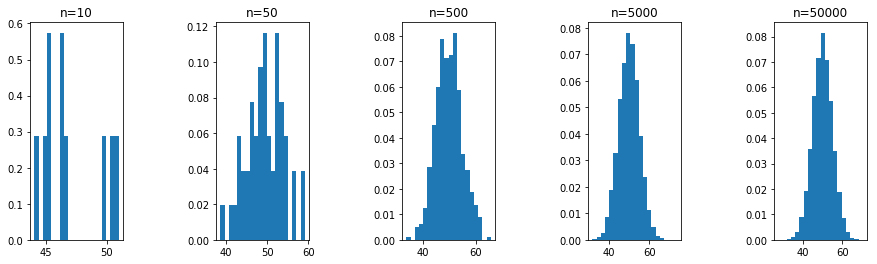

In [5]:
# let's plot the distibution:
# Your code here
f, ax = plt.subplots(1, 5)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 5):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

In [ ]:
# Only after looking the shape of these distributions, we can conclude that yes, they are normal distributions.

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

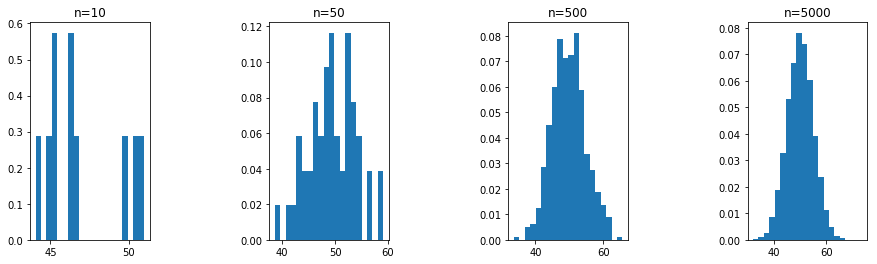

In [6]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [ ]:
'''
The more sample we have, the more normal is the distribution, the more precise is the sample mean estimation. 
The more robust is the sample, the more representative of the population is.
With only a small sample (of the considered population), we can get some standard desviation, but the more we add other samples, the less desviation
we will get doing the mean of the mean samples and the more we will be closer to the mean of this considered population.
''' 

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

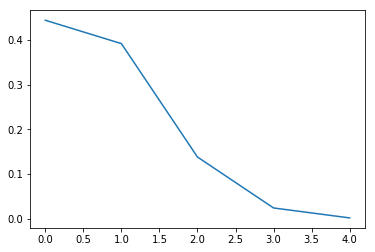

In [7]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

In [ ]:
'''
The most probable fact is that in a a sample of 5 people who watched the video nobody had click on the Ad 
from Youtube video, then the probabily decrease if we consider 1 people, 2 people, etc until 4 where the probability
is near null.
'''

#### Now plot PMP with 50, 500, and 5000 visitors.

In [8]:
# if we are going to plot several time and this mean copy/paste the same coding, it's preferible to build a function:
def pmf_plot(n,p):
    x = range(n)
    dist = binom(n, p)
    fig, ax = plt.subplots(1, 1)
    plt.plot(x, dist.pmf(x))
    return plt.show()

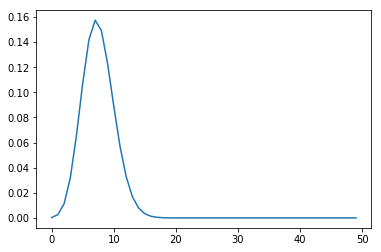

In [9]:
pmf_plot(50, 0.15)

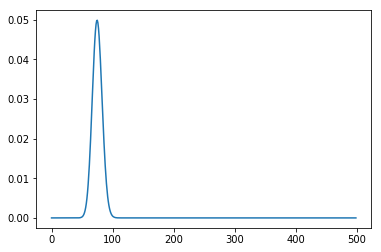

In [10]:
pmf_plot(500, 0.15)

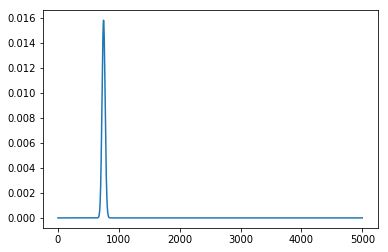

In [11]:
pmf_plot(5000, 0.15)

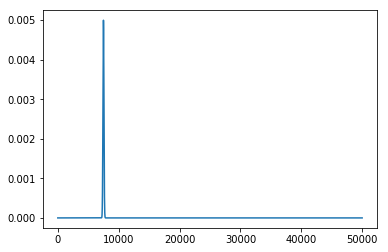

In [12]:
pmf_plot(50000, 0.15)

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
'''
We can see that the greater is the sample size, the more precise and closer is the maximum probability (corresponding 
to the mean value) to the probability assumption (0.15%) 
'''

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
'''
The Poisson distribution is kind of binomial limitation, when n (sample/experiments) tends to infinity 
and probability (p) tends to null (0). It's used for:
- "rare" events, such as anomalies probability: crimes in example.
- "limited time period" related events, such as number of urgent calls in 1 hour.
'''

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [16]:
# event = visit/day
value_lambda = 300 # average visits / day (statistical expectancy)
k = 320 # number of occurrences of the event

# P(x=320)= (e^(-300)*300^(320))/ k!
# but thanks to Python libraries:
print('the 320 visits/day occurence probability is',poisson.pmf(320,300))

the 320 visits/day occurence probability is 0.011612348610402475


In [17]:
#Check accuracy of cdf and ppf:
x = 320
mu = 300
prob = poisson.cdf(x, mu)
np.allclose(x, poisson.ppf(prob, mu))

True

#### What is the probability of getting 60 visits?

In [19]:
print('the occurence probability of getting 60 visits/day is',poisson.pmf(60,300))

the occurence probability of getting 60 visits/day is 2.622743762294515e-64


#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

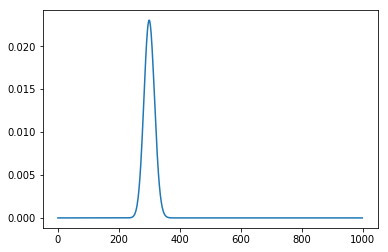

In [20]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)